<a href="https://colab.research.google.com/github/A01706648/TC3006C_Deliver/blob/main/m1/M1_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Questions:

## By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

*  **SIZE:**  
   + WE SAHLL CONSIDER THE FIRM'S ***TOTAL_ASSERT - TOTAL_LIABILITIES*** FOR ITS **BOOK VALUE**  
 BUT SINCE MOST OF THE US FIRMS ARE IN A VERY HIGH LEVARAGE,  
 WE MAY ALSO USE FIRM'S **TOTAL_ASSERT** AS ITS REAL PHYSICAL SIZE   
   + THE **MARKET VALUE** CAN ALSO REPRESENT FIRM'S SIZE ON THE STOCK MARKET  
 IT WILL BE ***ORIGINAL_PRICE \* SHARE_OUTSTANDING***  

* **SALE PERFORMANCE:**  
 **RENENUE** INDICATE HOW MUCH SALE IT IS DONE, IT CAN PRESENT DITRECTLY ON HOW THE SALE IS GOING  
 WHILE CONSIDERING THE PROFIT, WE SHALL ALSO CONSIDER THE **OPERATING PROFIT MARGIN** AS THE REAL SALE PERFORMANCE,  
 BECAUSE IT IS THE PROFIT BEFORE TAX TO THE PER SALE, MEANS HOW PROFITABLE FOR THE SALE  

* **PROFITABILITY**  
 WE SHALL CONSIDER THE **PROFIT MARGIN** FOR THE PROFITABILITY FOR EACH FIRM IN PHYSICAL TERM.  
 IT IS ***NET_INCOME / REVENUE***, AND INDICATES FOR EACH SALE, HOW NET PROFITABLE IT IS FOR THE FIRM.  
 WE CAN ALSO CONSIDER THE PROFITABILITY ON THE ***STOCK MARKET***,  
 WE CAN ALSO CONSIDER ***ANNUAL RETURN OF STOCK***, AND ***EARNING PER SHARE***,  
 SINCE ANNUAL RETURN INDICATE THE MONEY INVESTOR WILL EARN FROM STOCK MARKET ON THAT FIRM,  
 AND EPS INDICATE THE MONEY FIRM PHYSICALLY EARNING, CAN BE SPREAD TO EACH SHARE,  
 THEN THE INVESTOR WILL BE ABLE TO SHARE THE EARNING WHICH THE FIRM MADE.

* **WHY SOME FIRMS ARE MORE PROFITABLE THAN OTHERS?**  
 IF WE TALK ABOUT ***PROFIT MARGIN***,  
 SINCE SOME COMPANY'S PROFIT IS VERY LITTLE AMOUNT OF THEIR SALES, LIKE WALMART, THE RETAIL INDUSTRY.  
 AND SOME CONMPANY'S PROFIT IS VERY BIG STANDS A BIG PERCENTAGE OF THEIR SALE, LIKE GOOGLE, THE IT INDUSTRY.  
 BUT SOME COMPANY ALSO ***SELL*** A LOT WITH A LOW PROFIT MARGIN, AND SOME COMPANY CAN ***SELL*** VERY LITTLE WITH HIGH PROFIT MARGIN.  
 THOSE TWO FACTOR CAN AFFECT THE FINAL EARNING PER SHARE RESULT.  
 ALSO, THE ***LEVERAGE PERCENTAGE*** WILL AFFECT THE PROFITABLILITY ALSO.  
 THE COMPANY WITH HIGH LEVERAGE RATE, WILL NEED TO PAY MORE INTEREST AND PAYBACK THE DEBTS A LOT,  
 THAT WILL DECREASE THE NETINCOME.
 IF WE TALK ABOUT ***EARNING PER SHARE***  
 WE CAN CONSIDER IT DIRECTLY RELATED TO NETINCOME AND STOCK OUTSTANDING.  
 NET INCOME INDICATE HOW FIRMS PERFORM IN THE REAL WORLD.  
 IF WE CONSIDER ALL THE COMPANY PERFORM THE SAME IN REAL WORLD,  
 THEN MORE TAOCK OUTSTANDING ONE FIRM PUBLISH, THE LESS EARNING PER SHARE INVESTOR WILL GET.

**Which factors/variables from financial statements are related to stock returns?**  
SHORT LEVERAGE PERCENTAGE, EARNING PER SHARE, PROFIT MARGIN AND BOOK-MARKET-RATIO WILL ALL BE RELATED TO STOCK RETURN
ALSO WE SHALL CONSIDER THE BOOK VALUE OF THE COMPANY TOO.

#**Specific Questions:**



In [51]:
isGoogleColab = False

if(isGoogleColab):
    from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
industry_dict = {'Accommodation and Food Services':'Services',
       'Administrative and Support and Waste Management and Remediation Services':'Services',
       'Agriculture, Forestry, Fishing and Hunting':'Agriculture',
       'Arts, Entertainment, and Recreation':'Services', 
       'Construction':'Construction',
       'Educational Services':'Services', 
       'Finance and Insurance':'Finance',
       'Health Care and Social Assistance':'Services', 
       'Information':'Services',
       'Manufacturing':'Manufacturing', 
       'Mining, Quarrying, and Oil and Gas Extraction':'Mining',
       'Other Services (except Public Administration)':'Services',
       'Professional, Scientific, and Technical Services':'Services',
       'Real Estate and Rental and Leasing':'Finance', 
       'Retail Trade':'Comercial',
       'Transportation and Warehousing':'Services', 
       'Utilities':'Energy', 
       'Wholesale Trade':'Comercial'}

In [3]:
if(isGoogleColab):
    drive.mount("/content/gdrive") 
    %cd "/content/gdrive/MyDrive/Machine Learning/deliver/M1"
df = pd.read_csv('us2022q2a.csv')
df_firm = pd.read_csv('usfirms2022.csv')

In [4]:
bIsAproachNew = False

df_more = df.copy()

#put industry column
firm_list = df['firm'].unique()
firm_list = firm_list.tolist()
firm_list.remove(np.nan)
df_firm_more = df_firm.copy()
df_firm_more['industry'] = df_firm_more['Sector NAICS\nlevel 1']
df_firm_more = df_firm_more.replace({'industry': industry_dict})

firm_industry_dic = {}

if(bIsAproachNew):
  firm_industry_dic_temp = {}

  for count in range(df_firm_more['Ticker'].count()):
    firm_industry_dic_temp[df_firm_more['Ticker'][count]] = df_firm_more['industry'][count]

  #print(firm_industry_dic_temp)
else:
  for firm in firm_list:
    if (len((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist()) > 0):
      firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
    else:
      firm_industry_dic[firm] = np.nan

for firm in firm_list:
    if(bIsAproachNew):
      if((len(firm) > 0) and (firm in firm_industry_dic_temp)):
        firm_industry_dic[firm] = firm_industry_dic_temp[firm]
      #else:
      #  firm_industry_dic[firm] = np.nan
    else:
      if(len(firm) > 0):
        #firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
        temp_df = df_firm_more[df_firm_more['Ticker'] == firm]
        if(temp_df['industry'].count() > 0):
          firm_industry_dic[firm] = temp_df['industry'].tolist()[0]
      #else:
      #  firm_industry_dic[firm] = np.nan

df_more['industry'] = df_more['firm']
df_more = df_more.replace({'industry': firm_industry_dic})


#put country column
firm_country_dict = {}
for count in range(df_firm['Ticker'].count()):
    firm = df_firm['Ticker'][count]
    country = df_firm['Country\nof Origin'][count]
    firm_country_dict[firm] = country

df_more['country'] = df_more['firm']
df_more = df_more.replace({'country':firm_country_dict})
df_more = df_more.dropna(how='all')
df_more

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,industry,country
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,Manufacturing,US
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,Manufacturing,US
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,Manufacturing,US
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,Manufacturing,US
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,Manufacturing,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,Manufacturing,US
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,Manufacturing,US
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,Manufacturing,US
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,Manufacturing,US


In [5]:


#Calculate bookvalue
df_more['bookvalue'] = df_more['totalassets'] - df_more['totalliabilities']

#Calculate Market Value
df_more['marketvalue'] = df_more['originalprice'] * df_more['sharesoutstanding']

#Calculate Operating profit margin
df_more['op_profit'] = df_more['revenue'] - df_more['cogs'] - df_more['sgae'] - df_more['otheropexp']
df_more['op_profit_margin'] = df_more['op_profit'] / df_more['revenue']
df_more['net_income'] = df_more['op_profit'] - df_more['incometax'] - df_more['finexp'] + df_more['extraincome']
df_more['profit_margin'] = df_more['net_income'] / df_more['revenue']

#Calculate CC Return
df_more['anual_cc_return'] = np.log(df_more['adjprice']) - np.log(df_more['adjprice'].shift(4))

#add Date
df_more['date'] = pd.to_datetime(df_more['q'])

#Earning Per Share
df_more['eps'] = df_more['net_income'] / df_more['sharesoutstanding']

#Calculate the short term leverage

#Calculate the ratio of bookvalue and market value


In [6]:
df_more.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,country,bookvalue,marketvalue,op_profit,op_profit_margin,net_income,profit_margin,anual_cc_return,date,eps
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,US,NaN,4.700800e+07,NaN,NaN,NaN,NaN,NaN,2000-01-01,NaN
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,...,US,4642000.0,3.335506e+07,214000.0,0.086117,166000.0,0.066801,NaN,2000-04-01,0.367036
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,...,US,4902000.0,2.216940e+07,210000.0,0.078652,155000.0,0.058052,NaN,2000-07-01,0.342152
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,...,US,5265000.0,2.498606e+07,458000.0,0.135824,305000.0,0.090451,NaN,2000-10-01,0.668323
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,...,US,5541000.0,1.403653e+07,279000.0,0.098205,154000.0,0.054206,-1.219152,2001-01-01,0.337150


In [7]:
industry_list = df_more['industry'].unique()
industry_list = industry_list.tolist()
del industry_list[-1]
del industry_list[-1]
industry_list

['Manufacturing',
 'Finance',
 'Services',
 'Comercial',
 'Energy',
 'Construction',
 'Agriculture',
 'Mining']

In [8]:
#Show how many firms by industry there are in the sample
industry_firm_num = []
for industry in industry_list:
  industry_firm_num.append(len(df_more[df_more['industry'] == industry]['firm'].unique()))

df_industry_firm_num = pd.DataFrame({'Industry':industry_list,'firm num':industry_firm_num})
df_industry_firm_num

,Industry,firm num
0,Manufacturing,1565
1,Finance,769
2,Services,792
3,Comercial,231
4,Energy,77
5,Construction,45
6,Agriculture,16
7,Mining,103


**For each industry (and for all industries),**

**what can you say about the typical firm size in terms of market value and book value?**

We analyze the last quater of the market value and book value of all the firms for each industry.

We can see the dispersion in the box plot below.

They are very dispersive.

So we are going to use the median value of the market value and book value,

to indicate the typical firm size.

In [9]:
df_final_size = df_more.dropna()
df_final_size = df_final_size.groupby('firm').last()
#df_final_size

In [10]:
df_final_size.groupby('industry').median()[['bookvalue', 'marketvalue']]

,bookvalue,marketvalue
industry,,
Agriculture,1068506.5,1.264045e+06
Comercial,679144.0,1.487280e+06
Construction,998146.5,1.900822e+06
Energy,2914350.5,6.355661e+06
Finance,1038181.0,1.785152e+06
Manufacturing,246405.0,6.529413e+05
Mining,693059.0,1.056557e+06
Services,457566.0,1.956561e+06


In [11]:
#df_final_size[df_final_size['industry'] == 'Manufacturing']['bookvalue'].describe()

**How much these variables change within each industry?**

**How firm size (in market value) is distributed?**

In [12]:
px.box(df_final_size, x='industry', y='bookvalue', title='Book Value of all industries')

In [13]:
px.box(df_final_size, x='industry', y='marketvalue', title='Market Value of all industries')

For each industry (and for all industries), 

what can you say about profit margin of firms? 

a) descriptive statistics of profit margin and 
for the profit margin for the last quater of all industry

In [14]:
desc_dict = {'count':[], 'mean':[], 'std':[], 'min':[], '25%':[], '50%':[], '75%':[], 'max':[]}

for industry in industry_list:
    description = df_final_size[df_final_size['industry'] == industry]['profit_margin'].describe()
    for key in list(desc_dict.keys()):
        desc_dict[key].append(description[key])
    #desc_list.append(description)
    #print(industry)
    #print(description)
    #print('\n')

df_profit_margin = pd.DataFrame(desc_dict, index = industry_list)
df_profit_margin

,count,mean,std,min,25%,50%,75%,max
Manufacturing,1438.0,NaN,NaN,-inf,-4.972978,-0.032117,0.085495,inf
Finance,175.0,NaN,NaN,-inf,-0.019884,0.083146,0.187464,inf
Services,723.0,-inf,NaN,-inf,-0.170225,0.016052,0.094190,5.395082
Comercial,220.0,-0.000819,0.302966,-2.549859,0.006695,0.037644,0.074067,1.014139
Energy,76.0,-inf,NaN,-inf,0.044252,0.084252,0.155438,1.548913
Construction,44.0,0.071604,0.121165,-0.438356,0.022316,0.076800,0.134525,0.385378
Agriculture,16.0,-0.046275,0.286728,-0.979005,-0.035681,0.025442,0.106148,0.185485
Mining,100.0,-inf,NaN,-inf,0.008563,0.179333,0.378275,26.769638


b) plot(s) to illustrate how profit margin changes across industries.

In [15]:
px.box(df_final_size, x='industry', y='profit_margin', title='Profit Margin of all industries')

Which are the biggest 10 US firms in terms of market value 

In [16]:
industry_top10_marketvalue_dic = {}
df_final_size_us = df_final_size[df_final_size['country'] == 'US']

for industry in industry_list:
  df_temp = df_final_size_us[df_final_size_us['industry'] == industry].sort_values(['marketvalue'],ascending=False)[['marketvalue']].head(10)
  industry_top10_marketvalue_dic[industry] = {}
  industry_top10_marketvalue_dic[industry]['firm'] = df_temp.index.tolist()
  industry_top10_marketvalue_dic[industry]['marketvalue'] = df_temp['marketvalue'].tolist()

top10_marketvalue_data = {}
for industry in industry_list:
  for attribute in ['firm', 'marketvalue']:
    top10_marketvalue_data[industry + '_' + attribute] = industry_top10_marketvalue_dic[industry][attribute]

firm_marketvalue_median_us = df_final_size_us['marketvalue'].median()

df_top10_marketvalue = pd.DataFrame(top10_marketvalue_data)
df_top10_marketvalue

,Manufacturing_firm,Manufacturing_marketvalue,Finance_firm,Finance_marketvalue,Services_firm,Services_marketvalue,Comercial_firm,Comercial_marketvalue,Energy_firm,Energy_marketvalue,Construction_firm,Construction_marketvalue,Agriculture_firm,Agriculture_marketvalue,Mining_firm,Mining_marketvalue
0,AAPL,2.212838e+09,UNH,4.818731e+08,MSFT,1.920840e+09,AMZN,1.080624e+09,NEE,1.521918e+08,DHI,2.330088e+07,GIS,4.505560e+07,EOG,6.468620e+07
1,TSLA,6.976698e+08,AMT,1.166213e+08,GOOGL,1.435042e+09,WMT,3.332690e+08,DUK,8.254103e+07,LEN,2.056314e+07,CTVA,3.918112e+07,OXY,5.484625e+07
2,JNJ,4.671001e+08,ELV,1.163427e+08,META,4.363946e+08,HD,2.818823e+08,D,6.474749e+07,PWR,1.801249e+07,K,2.410383e+07,PXD,5.397621e+07
3,NVDA,3.789750e+08,BLK,9.227154e+07,V,3.743426e+08,COST,2.123033e+08,SO,6.406955e+07,J,1.635238e+07,INGR,5.837918e+06,SLB,5.057852e+07
4,XOM,3.569164e+08,CI,8.360790e+07,MA,3.068500e+08,CVS,1.215059e+08,AEP,4.926943e+07,NVR,1.317228e+07,POST,5.002324e+06,NEM,4.735716e+07
5,PG,3.449949e+08,MMC,7.792211e+07,VZ,2.131355e+08,LOW,1.116366e+08,SRE,4.723057e+07,PHM,9.417149e+06,CALM,2.418139e+06,FCX,4.240542e+07
6,LLY,3.080702e+08,NFLX,7.776567e+07,ORCL,1.861984e+08,TGT,6.548784e+07,EXC,4.443501e+07,KBR,6.753310e+06,FRPT,2.256704e+06,SCCO,3.850762e+07
7,PFE,2.941793e+08,CME,7.357354e+07,MCD,1.816339e+08,TJX,6.543587e+07,XEL,3.853967e+07,BLD,5.479154e+06,FDP,1.412091e+06,DVN,3.637260e+07
8,CVX,2.833974e+08,CCI,7.291387e+07,CMCSA,1.731755e+08,SHW,5.803368e+07,LNG,3.380812e+07,MTZ,5.438982e+06,BV,1.116000e+06,HAL,2.828596e+07
9,KO,2.727167e+08,BX,6.148956e+07,DIS,1.719481e+08,DG,5.571415e+07,ED,3.369345e+07,EME,5.265575e+06,AVO,1.006846e+06,CLR,2.372003e+07


In [17]:
df_temp = df_final_size_us.sort_values(['marketvalue'],ascending=False)[['marketvalue']].head(10)
df_temp = df_temp.reset_index()
df_temp = df_temp.copy()
df_temp.loc[10] = ['Us_Firm_Median', firm_marketvalue_median_us]
df_temp

,firm,marketvalue
0,AAPL,2.212838e+09
1,MSFT,1.920840e+09
2,GOOGL,1.435042e+09
3,AMZN,1.080624e+09
4,TSLA,6.976698e+08
5,UNH,4.818731e+08
6,JNJ,4.671001e+08
7,META,4.363946e+08
8,NVDA,3.789750e+08
9,V,3.743426e+08


<AxesSubplot:xlabel='firm', ylabel='marketvalue'>

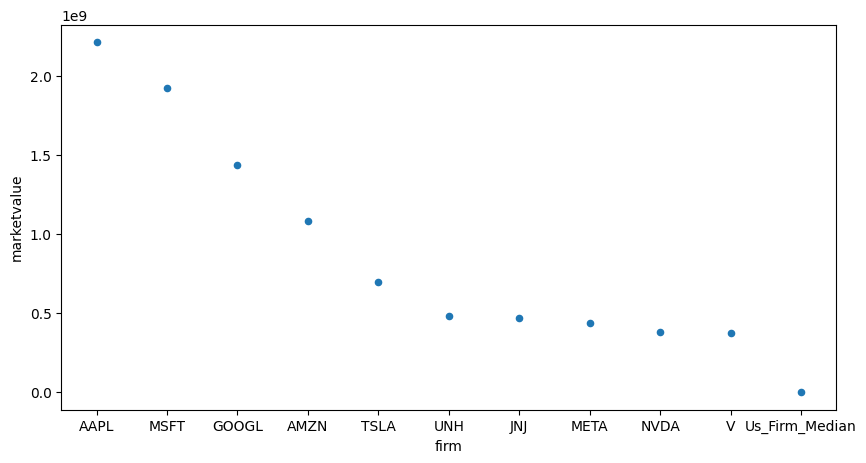

In [18]:
#insert the median of us firm
df_temp.plot('firm', 'marketvalue', kind ='scatter', figsize=(10,5))

and how far they are from the typical size of a US firm?

<AxesSubplot:xlabel='industry', ylabel='marketvalue'>

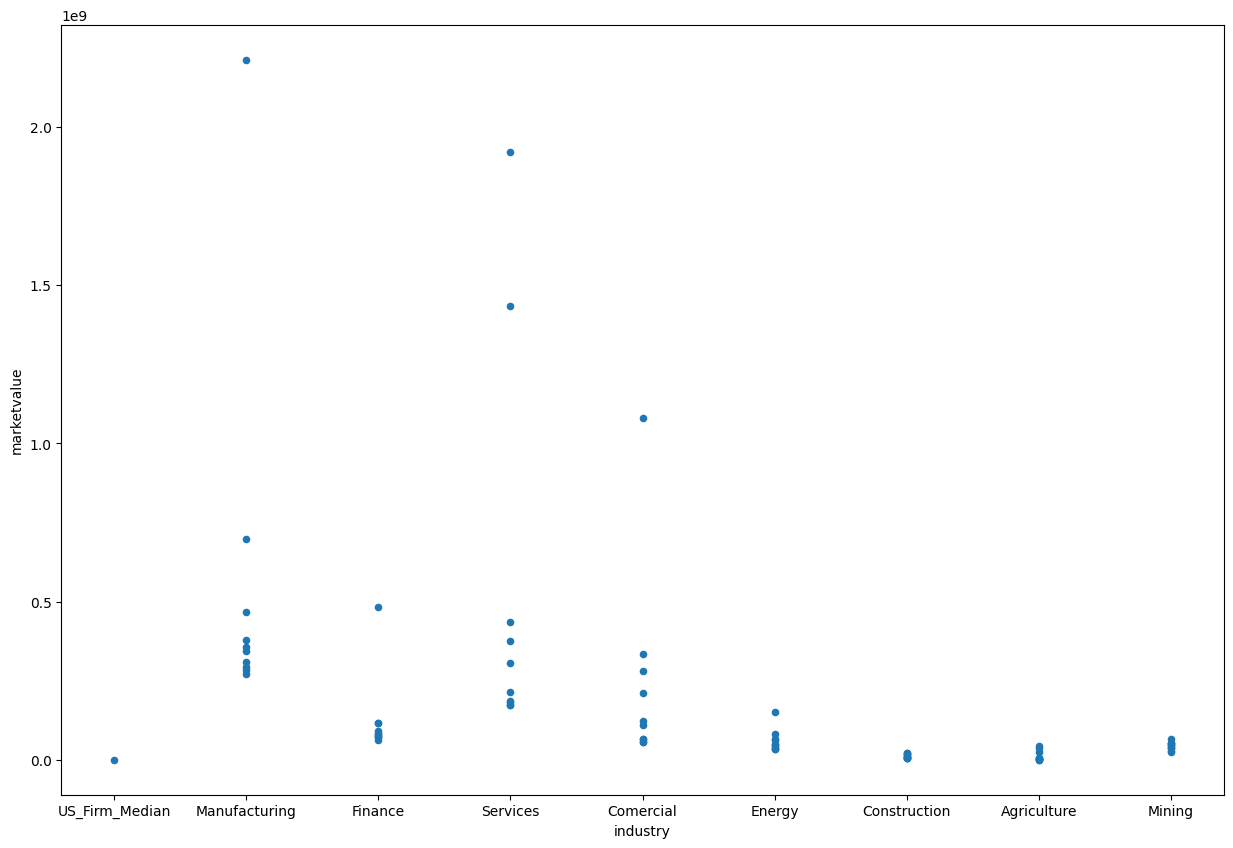

In [19]:
df_top10_marketvalue_2d_dict = {'firm':['mean'], 'marketvalue':[firm_marketvalue_median_us], 'industry':['US_Firm_Median']}
for industry in industry_list:
    df_top10_marketvalue_2d_dict['firm'].extend(industry_top10_marketvalue_dic[industry]['firm'])
    df_top10_marketvalue_2d_dict['marketvalue'].extend(industry_top10_marketvalue_dic[industry]['marketvalue'])
    
    for count in range(len(industry_top10_marketvalue_dic[industry]['firm'])):
        df_top10_marketvalue_2d_dict['industry'].append(industry)

df_top10_marketvalue_2d = pd.DataFrame(df_top10_marketvalue_2d_dict)
df_top10_marketvalue_2d.plot('industry', 'marketvalue', kind ='scatter', figsize=(15,10))

Considering the whole history of financial data for all firms:

1, How can you measure firm profitability that can be used to compare performance among firms of different sizes? 

Select and justify at least 3 measures and show descriptive statistics


In [20]:
df_final_size['marketvalue'].describe()

count    2.792000e+03
mean     1.250613e+07
std      7.397673e+07
min      3.490000e+01
25%      1.796944e+05
50%      1.174999e+06
75%      5.024743e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

count    2.369000e+03
mean     1.869005e+06
std      2.531450e+06
min      3.490000e+01
25%      1.299805e+05
50%      7.344904e+05
75%      2.678215e+06
max      1.219609e+07
Name: marketvalue, dtype: float64

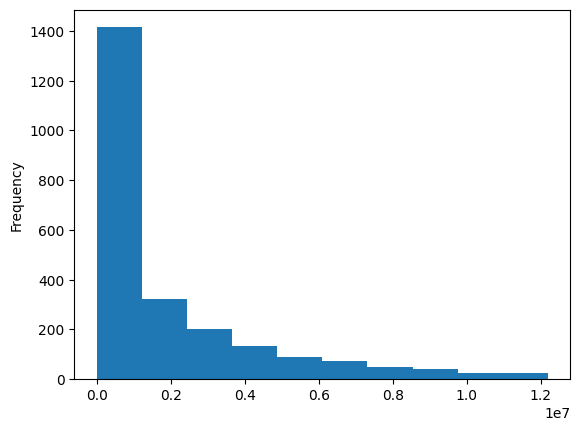

In [21]:
#shall the histrograph of all firm's size
#df_final_size['marketvalue'].plot(kind ='hist')
marketvalue_describe = df_final_size['marketvalue'].describe()
marketvalue_1q = marketvalue_describe['25%']
marketvalue_3q = marketvalue_describe['75%']
marketvalue_iqr = marketvalue_3q - marketvalue_1q
marketvalue_range_low = marketvalue_1q - (1.5 * marketvalue_iqr)
marketvalue_range_high = marketvalue_3q + (1.5 * marketvalue_iqr)
df_final_size_no_outlier = df_final_size[(df_final_size['marketvalue'] >= marketvalue_range_low) & (df_final_size['marketvalue'] <= marketvalue_range_high)]
df_final_size_no_outlier['marketvalue'].plot(kind ='hist')

df_final_size_no_outlier['marketvalue'].describe()

After remove the outlier, we can notice that 25% of the firm's market value is below 124 Million,

25% firms' market value is between, 664 million to 124 million,

25% firms' market vaule is between 2.5 billion to 664 million

25% firms' market value is above 2.5 Bilion

Take care of the outlier for the regression.
To replace it, (winshlization)

use kmean to classificate the company size(not required)

apply the national loan

In [22]:
#df_more_copy_clean = df_more.dropna()
from tkinter.ttk import Style


df_more_groupby_date = df_more.dropna().groupby('date')
#df_more_groupby_date['anual_cc_return'].median().plot(color='r')
#df_more.dropna(subset=['op_profit_margin']).groupby('date')['op_profit_margin'].median().plot(color='b')
df_op_profit_margin = df_more.dropna(subset=['op_profit_margin']).groupby('date')['op_profit_margin'].median()
#(df_more.dropna(subset=['anual_cc_return']).groupby('date')['anual_cc_return'].median()/10).plot(color='r')
df_annual_return = df_more.dropna(subset=['anual_cc_return']).groupby('date')['anual_cc_return'].median()
#df_more_groupby_date['profit_margin'].mean().plot(color='b')
#df_cc_return_mean = df_cc_return_mean.reset_index()


In [23]:
#df_more.dropna(subset=['eps']).groupby('date')['eps'].median().plot(color='b')
df_eps = df_more.dropna(subset=['eps']).groupby('date')['eps'].median()

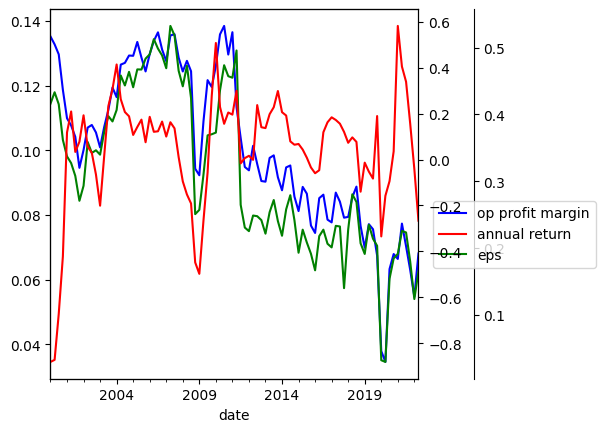

In [24]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df_op_profit_margin.plot(ax=ax, style='b-')
df_annual_return.plot(ax=ax, style='r-', secondary_y=True)
df_eps.plot(ax=ax3, style='g-')

ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['op profit margin','annual return','eps'], bbox_to_anchor=(1.5, 0.5))

In [25]:
corr = np.corrcoef(df_more.dropna(subset=['eps']).groupby('date')['eps'].median(), df_more.dropna(subset=['anual_cc_return']).groupby('date')['anual_cc_return'].median())
corr

array([[1.        , 0.06996958],
       [0.06996958, 1.        ]])

In [28]:
#px.line(df_cc_return_mean, x = 'date', y = 'anual_cc_return')

In [ ]:
#profit margine



***Calculate and explain earnings per share deflated by price***  
EPS = NET_INCOME / STOCK_OUTSTANDING  
EPSP = EPS / Original_Price  
IT MEANS, HOW MUCH NETINCOME WILL BE SHARED BY INVESTOR, BY EACH MONEY THE INVESTOR PAY FOR STOCK,  
WHEN EPSP IS HIGH, MEANS INVESTOR WILL GET MORE NETINCOME IF THEY PAY THE SAME MONEY TO BUY FIRM'S STOCK,  
IT CAN BE A INVESTMENT RETURN RATIO TO THE INVESTOR.

In [ ]:
"""
EPS = NetIncome / StockOutstanding

Ratios_EPS = EPS / Original_Price

When Original Price is higher, the EPSP will be lower.

when the stock price is high,
stack holder need to pay more to get the same amount of share.

cost more to get the same EPSP

For return ratio
"""
df_more['epsp'] = df_more['eps'] / df_more['originalprice']

# About statistical modeling

## For Financial services

## Select at least 3 factors and briefly explain why you think might be related to stock returns

I THINK THE **OPERATING_PROFIT_MARGIN, SHORT_TERM_LEVERAGE AND BOOK_MARKET_VALUE_RATIO**  
MAY BE RELATED TO THE ANNUAL STOCK RETURN OF ONE QUARTER IN THE FUTURE.

THE REASON IS THAT  
 **OPERATING_PROFIT_MARGIN** REFLECT HOW GOOD A FIRM IS RUNNING BASED ON ITS PROFITABLE BEHAVIOR,  
 **SHORT_TERM_LEVERAGE** REFLECT A URENT PAY NEED TO BE DONE WITHIN ONE YEAR, AND ANNUAL RETURN IS WITHIN ONE YEAR'S MARKET RETURN, SO THE SHORT_TERM_LEVERAGE WILL AFFECT THE PROFIT OF ONE FIRM WITHIN ONE YEAR  
 **BOOK_MARKET_RATIO** INDICATE THE RATIO BETWEEN THE BOOK VALUE AND MARKET VALUE, AND THE PERFORMANCE OF THE FIRM WILL AFFECT THE BOOK VALUE, WITH THE BOK_MARKET_RATIO, THE BOOK VALUE WILL AFFECT TO MARKET VALUE, AND THE CHANGE OF MARKET VALUE WILL AFFECT THE ANNUAL STOCK RETURN


In [34]:
df_finance = df_more[df_more['industry'] == 'Finance'].copy()
df_finance['short_leverage'] = df_finance['shortdebt'] / df_finance['totalassets']
df_finance['bmr'] = df_finance['bookvalue'] / df_finance['marketvalue']

df_finance.replace([np.inf, -np.inf], np.nan, inplace=True)

## ***Do histograms for each factor/variables and interpret them***  

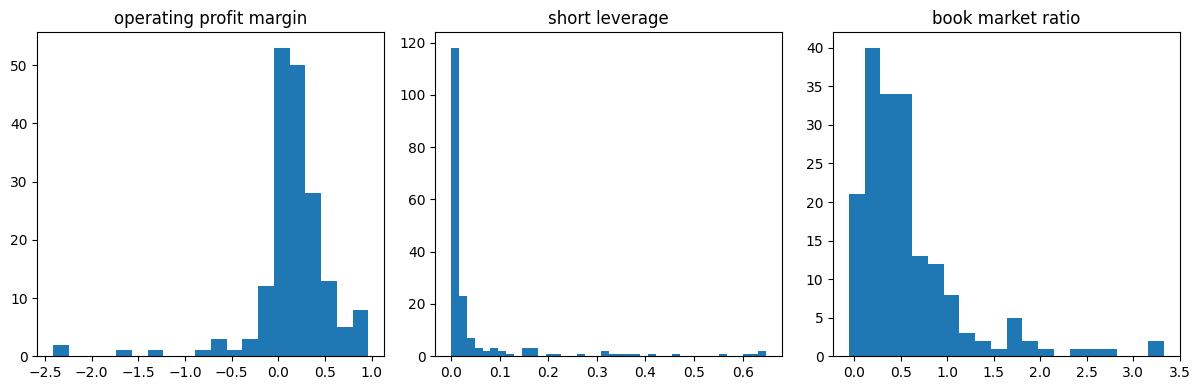

In [122]:
#Do histograms for each factor/variables and interpret them
from scipy.stats.mstats import winsorize
df_finance_win = df_finance.copy()
fig, axs = plt.subplots(1, 3, figsize=(12,4))

df_finance_win = df_finance_win.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_win = df_finance_win.groupby('firm').median()
#df_finance_win = df_finance_win.groupby('date').median()
df_finance_win['op_profit_margin'] = winsorize(df_finance_win['op_profit_margin'], limits=[0.01,0.01])
df_finance_win['short_leverage'] = winsorize(df_finance_win['short_leverage'], limits=[0.01,0.01])
df_finance_win['bmr'] = winsorize(df_finance_win['bmr'], limits=[0.01,0.01])

axs[0].hist(df_finance_win['op_profit_margin'], bins=20)
axs[0].set_title('operating profit margin')

axs[1].hist(df_finance_win['short_leverage'], bins=40)
axs[1].set_title('short leverage')

axs[2].hist(df_finance_win['bmr'], bins=20)
axs[2].set_title('book market ratio')

fig.tight_layout()
plt.show()



WE GET THE MEDIAN OF THE THREE FACTORS FOR EACH FIRM, AND WINSORIZED THE DATA WITH 1% IN TWO EDGE.  
FOR ***OP_PROFIT_MARGIN***,  
WE SEE MOST OF THE COMPANY IS DOING FROM -25% TO 80%, AND MAJORITY OF THE FIRMS IS MORE THAN 0%.  
SO IT MEANS MOST OF THE COMPANY IS EARNING THE MONEY, ONLY SMALL AMOUNT OF FIRM IS LOSING MONEY.  
WHEN LOSING MONEY, THE COMPANY IS NOT LOSING TOO MUCH, MOSTLY LESS THAN -25% OF THEIR SALE,  
WHEN EARNING MONEY, THE FIRM ALSO NOT EARN TOO MUCH, MOSTLY LESS THAN 80% OF THEIR SALE.   
FOR ***SHORT TERM LEVERAGE***  
WE SEE MOST OF THE FIRMS IS DOING FROM 0% TO 5%,  
SO IT INDICATE MOST OF THE COMPAY NEED TO PAY THE DEBT WITH 0% TO 5% OF THEIR TOTAL ASSERT WITHIN ONE YEAR.  
FOR ***BOOK MARKET RATIO***  
WE SEE MOST OF THE FIRMS IS DOINF FROM 0 TO 1,  
SO IT MEANS THAT MOST OF FIRMS' BOOK VALUE IS 0 TO 1 OF THEIR MARKET VALUE,  
AND THE CHANGE OF THEIR BOOK VALUE WILL AFFECT THEIR MARKET VALUE BY 0% TO 100%.


## **Do plots to visualize the possible relationship each factor might have with the dependent variable.**  

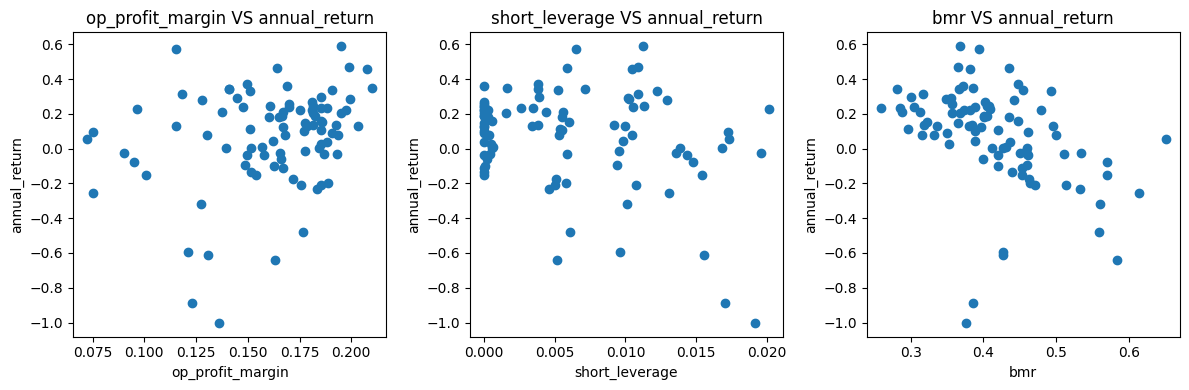

In [104]:
#Do plots to visualize the possible relationship each factor might have with the dependent variable.
fig, axs = plt.subplots(1, 3, figsize=(12,4))
df_finance_date = df_finance.copy()
df_finance_date = df_finance_date.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_date = df_finance_date.groupby('date').median()

axs[0].scatter(df_finance_date['op_profit_margin'], df_finance_date['anual_cc_return'])
axs[0].set_title('op_profit_margin VS annual_return')
axs[0].set_ylabel('annual_return')
axs[0].set_xlabel('op_profit_margin')

axs[1].scatter(df_finance_date['short_leverage'], df_finance_date['anual_cc_return'])
axs[1].set_title('short_leverage VS annual_return')
axs[1].set_ylabel('annual_return')
axs[1].set_xlabel('short_leverage')

axs[2].scatter(df_finance_date['bmr'], df_finance_date['anual_cc_return'])
axs[2].set_title('bmr VS annual_return')
axs[2].set_ylabel('annual_return')
axs[2].set_xlabel('bmr')

fig.tight_layout()
plt.show()


FROM THE SCATTER CHART, WE CAN SEE  
OP_PROFIT_MARGIN MIGHT BE PROPTIONAL WITH ANNUAL RETURN  
SHORT LEVERAGE MIGHT NOT BE VERY SIGNIFICANT RELATED TO ANNUAL RETURN  
BMR MIGHT BE INVERSELY PROPOTIONAL TO ANNUAL RETURN

## ***Show descriptive statistics of these factors***


In [119]:
df_finance_win_alltime = df_finance.copy()
df_finance_win_alltime = df_finance_win_alltime.dropna(subset=['op_profit_margin', 'short_leverage', 'bmr'])
df_finance_win_alltime['op_profit_margin'] = winsorize(df_finance_win_alltime['op_profit_margin'], limits=[0.01,0.01])
df_finance_win_alltime['short_leverage'] = winsorize(df_finance_win_alltime['short_leverage'], limits=[0.01,0.01])
df_finance_win_alltime['bmr'] = winsorize(df_finance_win_alltime['bmr'], limits=[0.01,0.01])

In [120]:
#Show descriptive statistics of these factors
df_finance_win_alltime['op_profit_margin'].describe()

count    7768.000000
mean        0.127191
std         0.523404
min        -3.327397
25%         0.053446
50%         0.167300
75%         0.331245
max         0.958289
Name: op_profit_margin, dtype: float64

FOR ***OPERATIONAL PROFIT MARGIN***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS BELOW 5.3%  
50% ALL THE TIME, IS IS BETWEEN 5.3% TO 33.1%  
25% ALL THE TIME, IS IS ABOVE 33.1%  
THE MEDIAN OF IT WILL BE 12.7%  
THE MEAN OF THE OP_PROFIT_MARGIN IS 12.7%, WITH STANDARD ERROR OF 52%

In [115]:
df_finance_win_alltime['short_leverage'].describe()

count    7768.000000
mean        0.044283
std         0.103529
min         0.000000
25%         0.000000
50%         0.004291
75%         0.033086
max         0.611525
Name: short_leverage, dtype: float64

FOR ***SHORT LEVERAGE***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS 0% 
50% ALL THE TIME, IS IS BETWEEN 0% TO 3.3%  
25% ALL THE TIME, IS IS ABOVE 3.3%  
THE MEDIAN OF IT WILL BE 0.43%  
THE MEAN OF THE SHORT LEVERAGE IS 4.4%, WITH STANDARD ERROR OF 10.4%

In [116]:
df_finance_win_alltime['bmr'].describe()

count    7768.000000
mean        0.586900
std         0.684233
min        -0.149714
25%         0.205327
50%         0.400654
75%         0.694646
max         4.361542
Name: bmr, dtype: float64

FOR ***BOOK MARKET VALUE RATIO***  
FOR ALL THE FIRM  
25% ALL THE TIME, IT IS BELOW 0.2  
50% ALL THE TIME, IS IS BETWEEN 0.2 TO 0.7  
25% ALL THE TIME, IS IS ABOVE 0.7  
THE MEDIAN OF IT WILL BE 0.4 
THE MEAN OF THE BOOK MARKET VALUE RATIO IS 0.59, WITH STANDARD ERROR OF 0.68

short leverage 
Profit Margin

Design and run a multiple regression model 

to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. 

You have to control for industry and firm size. 

To control for these variables you have to include them as extra independent variables in the model

    Your independent variables must be in the right scale 
    so that you can compare the values of the variables among different firms of any size

    For each independent variable you have to check for outliers 
    and do the corresponding adjustments to avoid unreliable results in your regression model

    You must check for possible multicollinearity problems. 
    Briefly explain what is multicollinearity, 
    run and interpret the corresponding test

Interpret your model

    Interpret the results of each coefficient (beta and their statistical significance)
        ABCDE

    Interpret the R-squared of the model

Adjustments to your model. 

If there is one or more independent variables (factors or control variables) 

that were not significant, 

drop them from your model. 

You have to run and interpret your final model.